In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



d:\AIDU\flower_classification


In [2]:
from libs.common import *
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images, plot_loss, plot_accuracy,plot_confusion_matrix
from models.models import VGG16, RESNET50, InceptionV3





d:/AIDU/flower_classification


In [3]:
image_test_data=f'{data_dir}/test'
test_datagen = ImageDataGenerator(rescale=1./255.)

test_image_gen = test_datagen.flow_from_directory(
    image_test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 140 images belonging to 14 classes.


In [4]:
test_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11,
 'tulip': 12,
 'water_lily': 13}

#### VGG16

In [5]:
vgg16_model = VGG16(include_top=False,input_shape=(224,224,3),pooling='avg')
vgg16_model.load_weights(f"{weights_models_dir}/rcmalli_vggface_tf_notop_vgg16.h5")
x = vgg16_model.layers[-1].output
prediction_vgg16=Dense(14, activation='softmax',name='output2')(x)
vgg16_model = Model(inputs=vgg16_model.input, outputs=prediction_vgg16,name='vgg16')
lr=0.0001
vgg16_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
vgg16_model.load_weights(f'{weights_prj_dir}/vgg16.h5')
# vgg16_model.load_weights('weights/vgg16.weights.h5') # File modelcheckpoint callbacks

In [7]:
loss, acc = vgg16_model.evaluate(test_image_gen)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


e:\User\miniconda3\envs\image_ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8599 - loss: 0.4444
Test Loss: 0.4037967324256897
Test Accuracy: 0.8714285492897034


In [8]:
probability = vgg16_model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


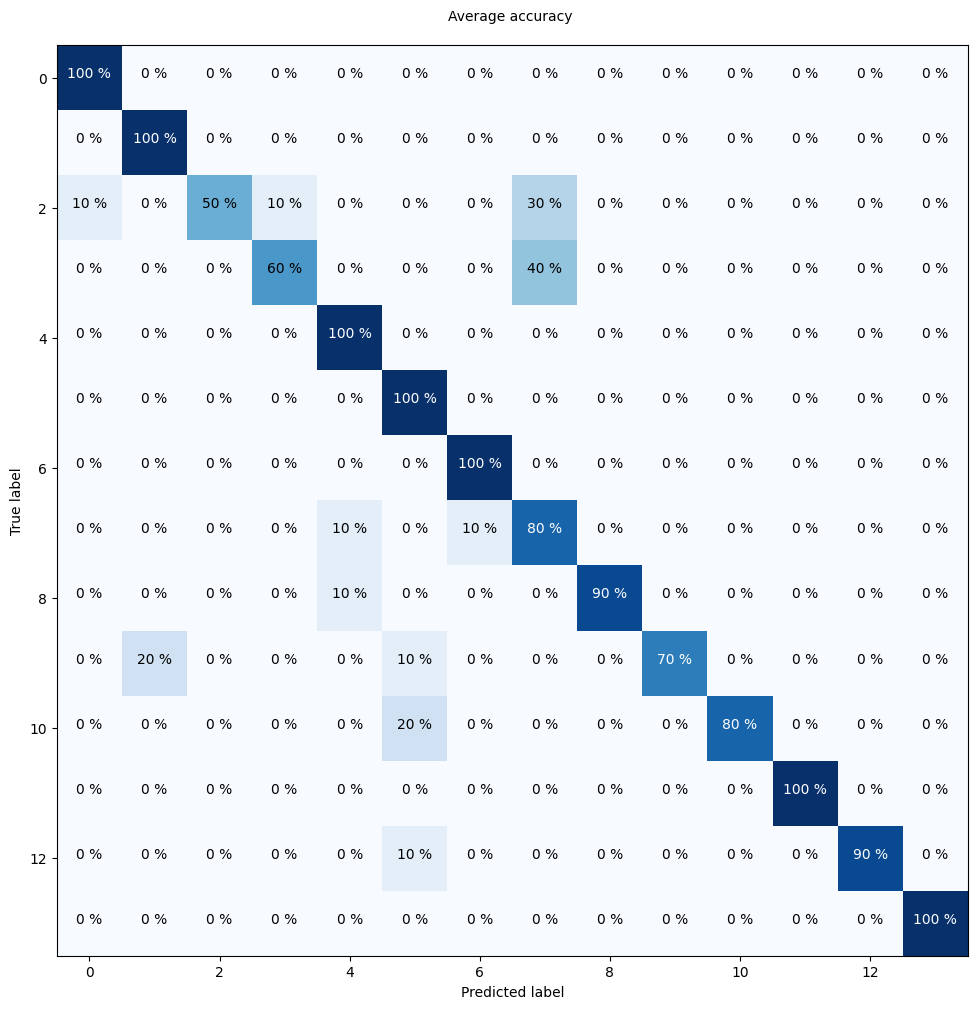

In [9]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10, figsize=(15,10))

#### InceptionV3

In [10]:
inceptionv3_model = InceptionV3(include_top=False,input_shape=(224,224,3),pooling='avg')
# inceptionv3_model.load_weights(f"{weights_models_dir}/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")
x = inceptionv3_model.layers[-1].output
prediction_inceptionv3=Dense(14, activation='softmax',name='output2')(x)
inceptionv3_model = Model(inputs=inceptionv3_model.input, outputs=prediction_inceptionv3,name='inceptionv3')
lr=0.0001
inceptionv3_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
inceptionv3_model.load_weights(f'{weights_prj_dir}/inceptionv3.h5')
# inceptionv3_model.load_weights('weights/inceptionv3.weights.h5')

In [12]:
loss, acc = inceptionv3_model.evaluate(test_image_gen)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - accuracy: 0.8864 - loss: 0.5248
Test Loss: 0.4265766441822052
Test Accuracy: 0.8857142925262451


In [13]:
probability = inceptionv3_model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 724ms/step


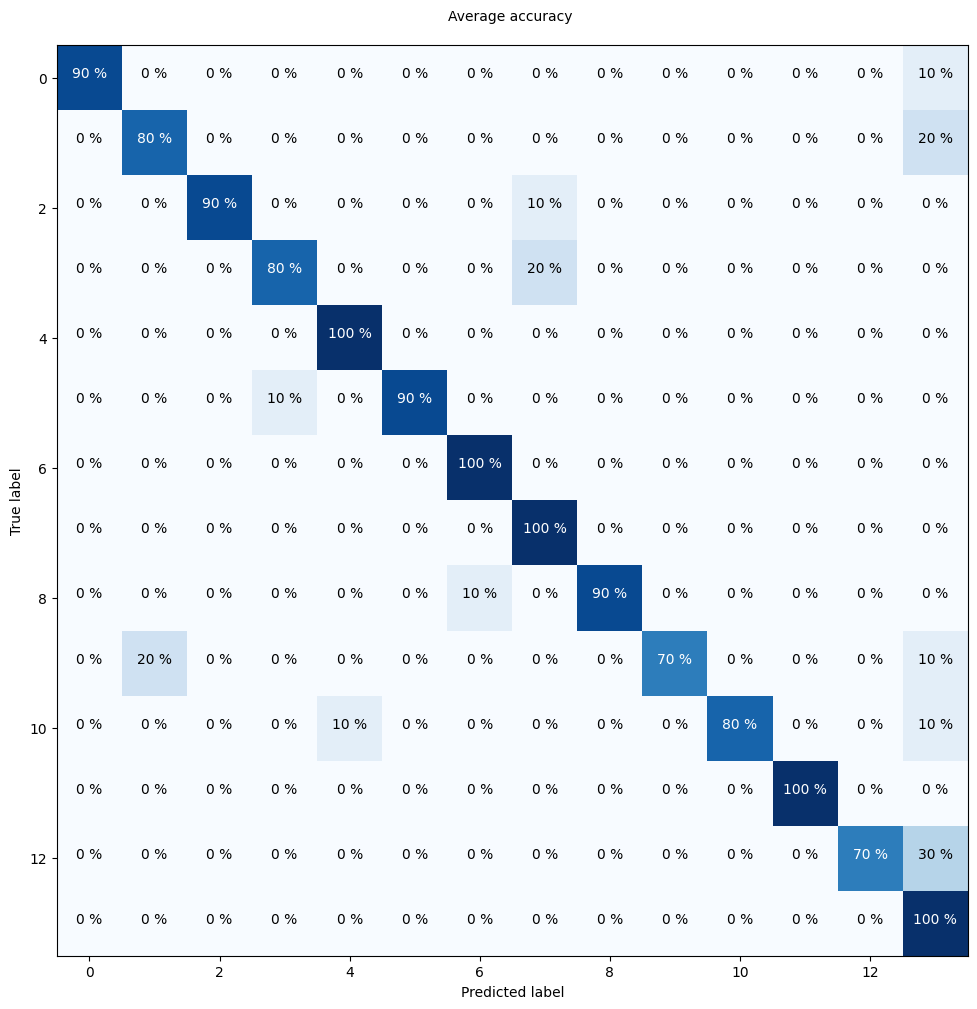

In [14]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10, figsize=(15,10))

#### Other models (Model designed based CNN architecture) by Vu Phuong in Team2

In [19]:
from tensorflow.keras.models import load_model
model = load_model(f'{weights_prj_dir}/Flower_Classification_Large_2.h5')


In [20]:
test = test_datagen.flow_from_directory(
    image_test_data,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 140 images belonging to 14 classes.


In [21]:
loss, acc = model.evaluate(test)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


e:\User\miniconda3\envs\image_ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.7377 - loss: 1.2003
Test Loss: 1.4057291746139526
Test Accuracy: 0.699999988079071


In [22]:
probability = model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A4C9DC2940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step


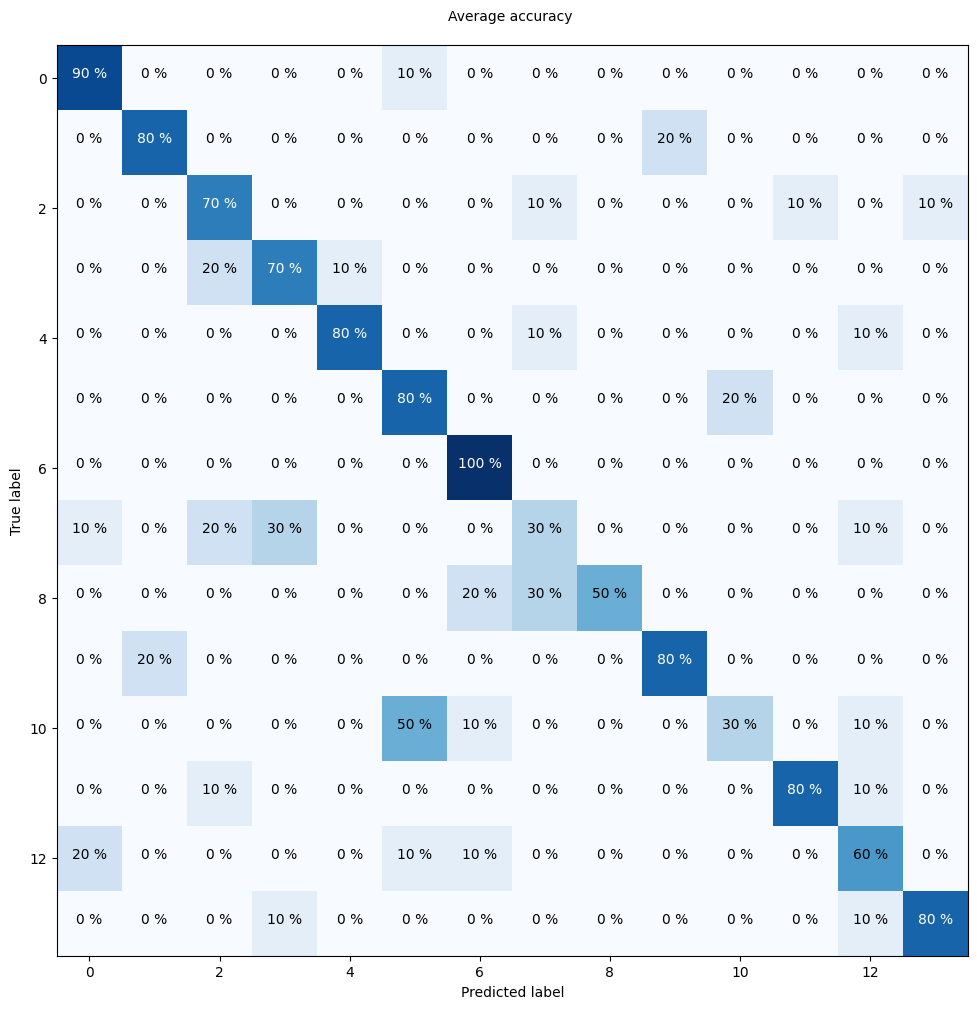

In [23]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10, figsize=(15,10))